In [11]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape, digits.images.shape

((1797, 64), (1797, 8, 8))

<Figure size 640x480 with 0 Axes>

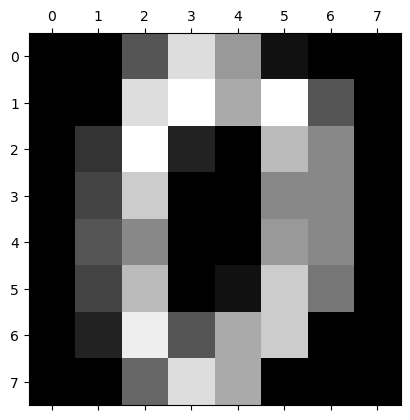

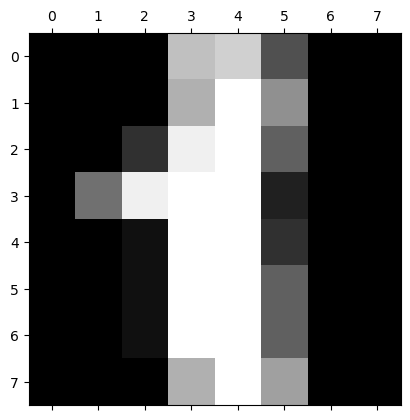

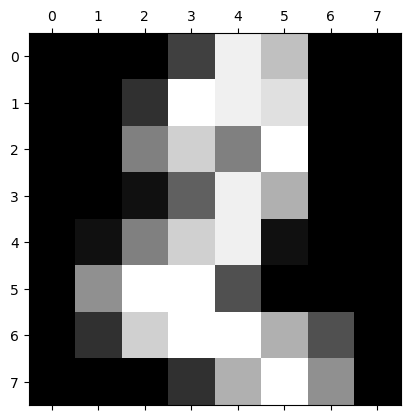

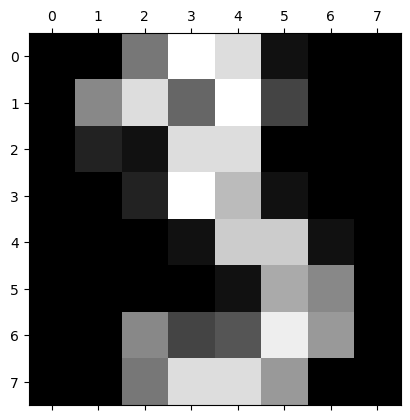

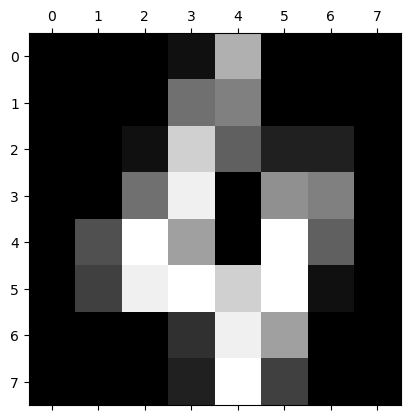

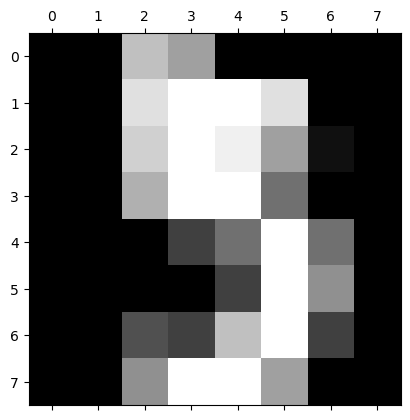

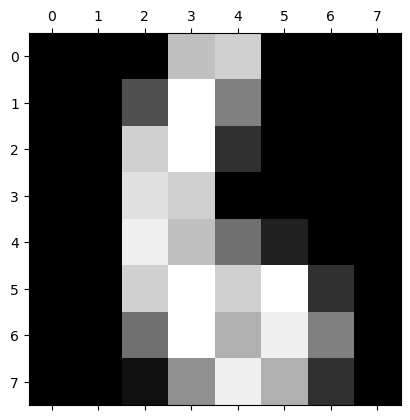

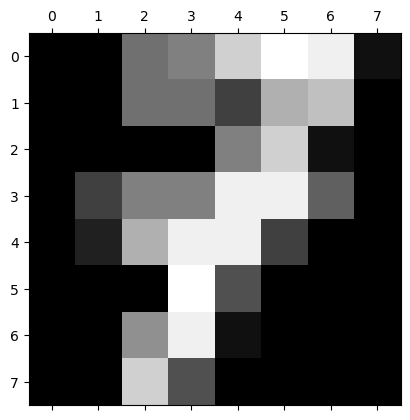

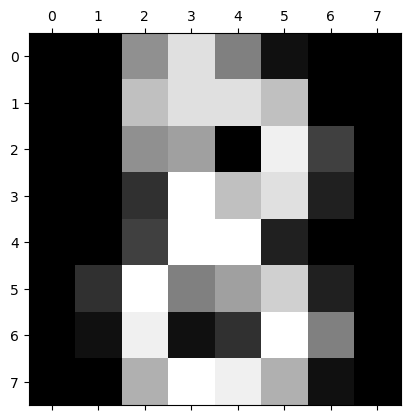

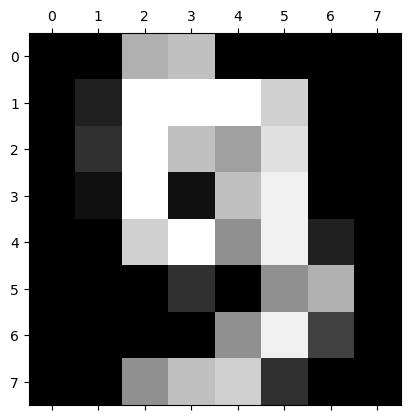

In [16]:
import matplotlib.pyplot as plt
plt.gray()
for i in range(10):
    plt.matshow(digits.images[i])
plt.show()

In [19]:
digits.data.shape, digits.target.shape

((1797, 64), (1797,))

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV

k = {'n_neighbors': [3,4,5,6,7]}
knn = KNeighborsClassifier(n_neighbors=5)
gsc = GridSearchCV(estimator=knn, param_grid=k, cv=4, verbose=0)
gsc.fit(X_train, y_train)
print('最好的参数:', gsc.best_params_)
y_pred = gsc.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f1)
for y, y_hat in zip(y_test, y_pred):
    if y_hat == y:
        print(y, y_hat)
    else:
        print('===>', y, y_hat)

最好的参数: {'n_neighbors': 3}
0.9838693018809959
6 6
9 9
3 3
7 7
2 2
1 1
5 5
2 2
5 5
2 2
1 1
9 9
4 4
0 0
4 4
2 2
3 3
7 7
8 8
8 8
4 4
3 3
9 9
7 7
5 5
6 6
3 3
5 5
6 6
3 3
4 4
9 9
1 1
4 4
4 4
6 6
9 9
4 4
7 7
6 6
6 6
9 9
1 1
3 3
6 6
1 1
3 3
0 0
6 6
5 5
5 5
1 1
===> 9 3
5 5
6 6
0 0
9 9
0 0
0 0
1 1
0 0
4 4
5 5
2 2
4 4
5 5
7 7
0 0
7 7
5 5
9 9
5 5
5 5
4 4
7 7
0 0
4 4
5 5
5 5
9 9
9 9
0 0
2 2
3 3
8 8
0 0
6 6
4 4
4 4
9 9
1 1
2 2
8 8
3 3
5 5
2 2
9 9
0 0
4 4
4 4
4 4
3 3
5 5
3 3
1 1
3 3
5 5
9 9
4 4
2 2
7 7
7 7
4 4
4 4
1 1
9 9
2 2
7 7
8 8
7 7
2 2
6 6
9 9
4 4
0 0
7 7
2 2
7 7
5 5
8 8
7 7
5 5
7 7
===> 7 9
0 0
6 6
6 6
4 4
2 2
8 8
0 0
9 9
4 4
6 6
9 9
9 9
6 6
9 9
0 0
3 3
5 5
6 6
6 6
0 0
6 6
4 4
3 3
9 9
3 3
===> 9 4
7 7
2 2
9 9
0 0
4 4
5 5
3 3
6 6
5 5
9 9
9 9
8 8
4 4
2 2
1 1
3 3
7 7
7 7
2 2
2 2
3 3
9 9
8 8
0 0
3 3
2 2
2 2
5 5
6 6
9 9
9 9
4 4
1 1
5 5
4 4
2 2
3 3
6 6
4 4
8 8
5 5
9 9
5 5
7 7
===> 8 1
9 9
4 4
8 8
1 1
5 5
4 4
4 4
9 9
6 6
1 1
8 8
6 6
0 0
4 4
5 5
2 2
7 7
4 4
6 6
4 4
5 5
6 6
0 0
3 3
2 2
3 3
6 6
7 7
1 1

## MNIST数据集

In [33]:
import numpy as np

X = np.loadtxt("./mnist_x")
y = np.loadtxt("./mnist_y")

In [34]:
X.shape, y.shape

((1000, 784), (1000,))

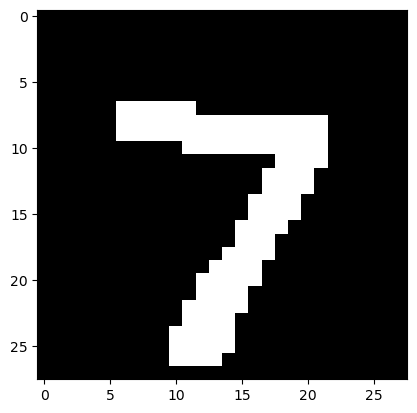

In [37]:
from matplotlib import pyplot as plt
image = X[0].reshape(28,28)
plt.imshow(image, cmap='gray')
# plt.matshow(image)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
estimator = KNeighborsClassifier(n_neighbors=3)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n         0.0       0.90      1.00      0.95        18\n         1.0       0.69      1.00      0.82        18\n         2.0       0.89      0.81      0.85        31\n         3.0       0.91      0.81      0.86        26\n         4.0       0.93      0.68      0.79        19\n         5.0       0.61      0.85      0.71        13\n         6.0       1.00      0.94      0.97        18\n         7.0       0.80      0.91      0.85        22\n         8.0       0.94      0.62      0.75        24\n         9.0       0.62      0.73      0.67        11\n\n    accuracy                           0.83       200\n   macro avg       0.83      0.84      0.82       200\nweighted avg       0.85      0.83      0.83       200\n'

pred: [6.]


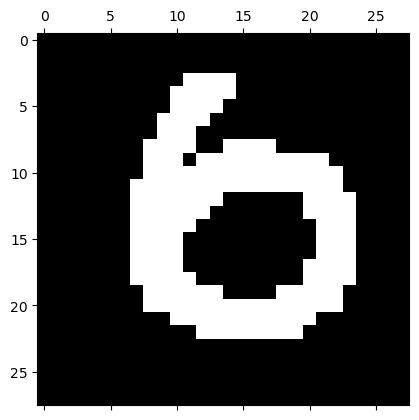

In [49]:
index=259
y_hat = estimator.predict(X[index].reshape(1, -1))
plt.matshow(X[index].reshape(28,28))
print("pred:", y_hat)

In [50]:
from sklearn.model_selection import cross_val_score

cross_val_score(estimator, X, y, cv=5)

array([0.86 , 0.88 , 0.845, 0.91 , 0.865])

模型评分: 0.90625
预测: [8.]


<Figure size 1000x1000 with 0 Axes>

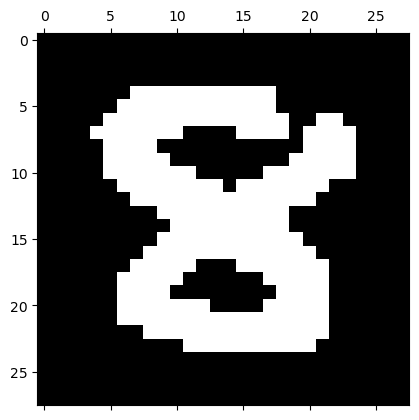

target: 8.0


In [65]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from joblib import dump, load

def load_data():
    data = np.loadtxt("./mnist_x")
    target = np.loadtxt("./mnist_y")
    return data, target

def show_digit(data, target, idx):
    if idx<0 or idx>len(data)-1:
        return
    plt.figure(figsize=(10,10))
    plt.matshow(data[idx].reshape(28,28))
    plt.show()
    print("target:", target[idx])

# show_digit(0)

def train(data, target):
    data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)
    # data_scaled = StandardScaler().fit_transform(data_train)
    knn_estimator = KNeighborsClassifier(n_neighbors=3)
    knn_estimator.fit(data_train, target_train)
    print('模型评分:', knn_estimator.score(data_train, target_train))
    dump(knn_estimator, './knn_estimator.joblib')

if __name__ == '__main__':
    data_orign, target = load_data()
    data = StandardScaler().fit_transform(data_orign)
    train(data, target)

    knn = load('./knn_estimator.joblib')
    indx = 876
    print('预测:', knn.predict(data[indx].reshape(1, -1)))
    show_digit(data_orign, target, indx)